2025-05-03 10:25:46.231449: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-03 10:25:46.231955: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-03 10:25:46.234015: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-03 10:25:46.239734: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746257146.250021   12490 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746257146.25

Epoch 1/50


/home/seda-ozkaya/PycharmProjects/Cifar-10/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-03 10:25:51.043053: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2025-05-03 10:25:51.043093: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:178] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-05-03 10:25:51.043100: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] retrieving CUDA diagnostic information for host: seda-ozkaya-ABRA-A5-V2

782/782 ━━━━━━━━━━━━━━━━━━━━ 95s 118ms/step - accuracy: 0.3340 - loss: 2.1337 - val_accuracy: 0.4913 - val_loss: 1.5813 - learning_rate: 0.0010
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 99ms/step - accuracy: 0.5235 - loss: 1.3235 - val_accuracy: 0.5744 - val_loss: 1.2903 - learning_rate: 0.0010
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 72ms/step - accuracy: 0.6063 - loss: 1.1007 - val_accuracy: 0.6756 - val_loss: 0.9637 - learning_rate: 0.0010
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 71ms/step - accuracy: 0.6505 - loss: 0.9927 - val_accuracy: 0.6837 - val_loss: 0.9445 - learning_rate: 0.0010
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 67ms/step - accuracy: 0.6813 - loss: 0.9168 - val_accuracy: 0.7217 - val_loss: 0.8377 - learning_rate: 0.0010
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 54s 69ms/step - accuracy: 0.7022 - loss: 0.8545 - val_accuracy: 0.7278 - val_loss: 0.7855 - learning_rate: 0.0010
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 54s 69ms/step - accuracy: 0.7162 - loss: 0.809

Test Doğruluğu: 88.38%
Model kaydedildi.


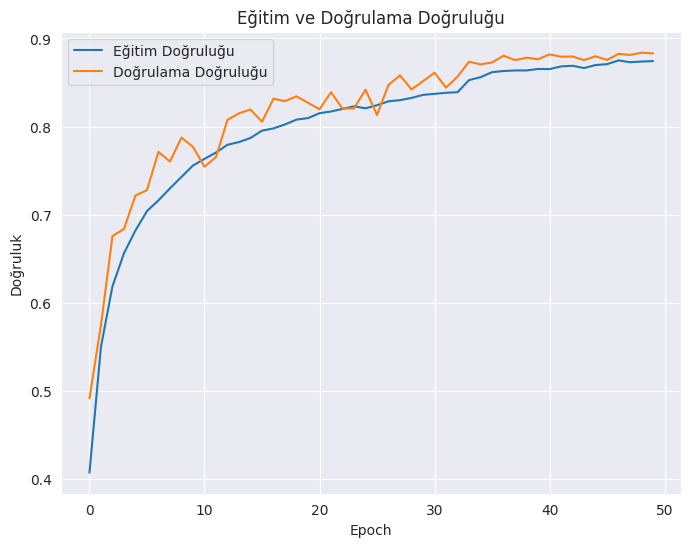

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step


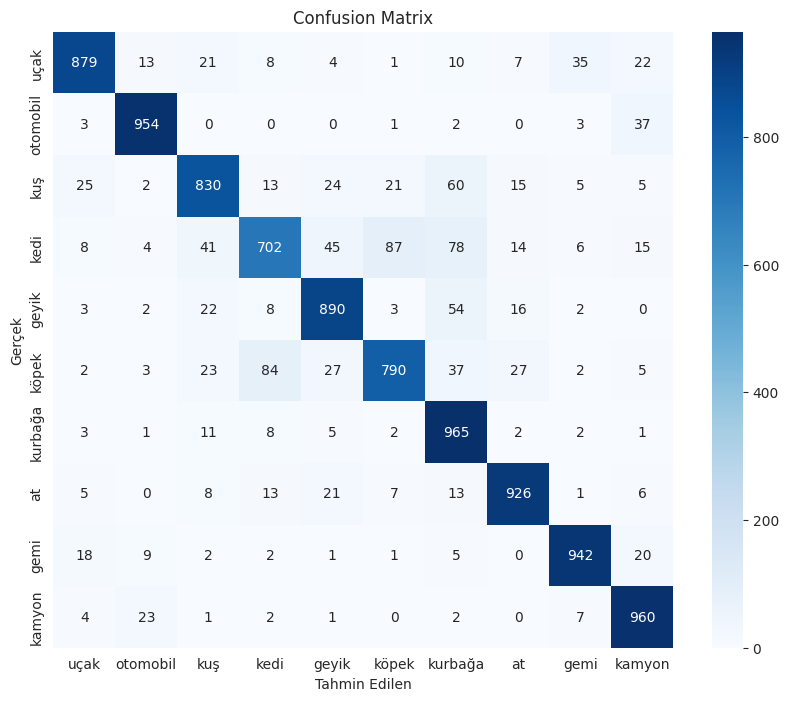

Sınıflandırma Raporu:

              precision    recall  f1-score   support

        uçak       0.93      0.88      0.90      1000
    otomobil       0.94      0.95      0.95      1000
         kuş       0.87      0.83      0.85      1000
        kedi       0.84      0.70      0.76      1000
       geyik       0.87      0.89      0.88      1000
       köpek       0.87      0.79      0.83      1000
     kurbağa       0.79      0.96      0.87      1000
          at       0.92      0.93      0.92      1000
        gemi       0.94      0.94      0.94      1000
      kamyon       0.90      0.96      0.93      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Veri yükleme ve ön işleme
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

class_names = ['uçak', 'otomobil', 'kuş', 'kedi', 'geyik',
               'köpek', 'kurbağa', 'at', 'gemi', 'kamyon']

# Veri artırma
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2
)
datagen.fit(x_train)

# Geliştirilmiş model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Model derleme
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Erken durdurma ve öğrenme oranı azaltma
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)

# Model eğitimi (veri artırma ile)
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=50,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping, reduce_lr])

# Test doğruluğunu yazdırma
test_kayip, test_dogruluk = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Doğruluğu: {test_dogruluk*100:.2f}%")

# Modeli kaydetme
model.save("cifar10_gelismis_model.h5")
print("Model kaydedildi.")

# Eğitim ve doğrulama doğruluğunu görselleştirme
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.grid(True)
plt.show()

# Confusion Matrix
y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()

# Classification Report
report = classification_report(y_true, y_pred_classes, target_names=class_names)
print("Sınıflandırma Raporu:\n")
print(report)